# SOCIAL NETWORK ANALYSIS of  Nashville Meetup Network Data

#### meetup.com is a website for people organizing and attending regular or semi-regular events ("meet-ups"). The relationships amongst users—who goes to what meetups—are a social network, ideal for graph-based analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

# Imports for Network
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import pylab as plt 
from itertools import count 
from operator import itemgetter 
from networkx.drawing.nx_agraph import graphviz_layout 
import pylab

In [43]:
full_df = pd.read_csv('member-edges.csv')
print(len(full_df))

1176368


# Network visualization

##### Try to guess these nodes representing people in the network layout who belong to the following rubrics:    
    Who are the people who most influence the network?
    Who are the people who influence the transfer of information?
    Which are the best performers in information transfer?

In [61]:
# We will limit the computing time a bit by reducing the size of the data.
df1 = full_df[0 : 2000]

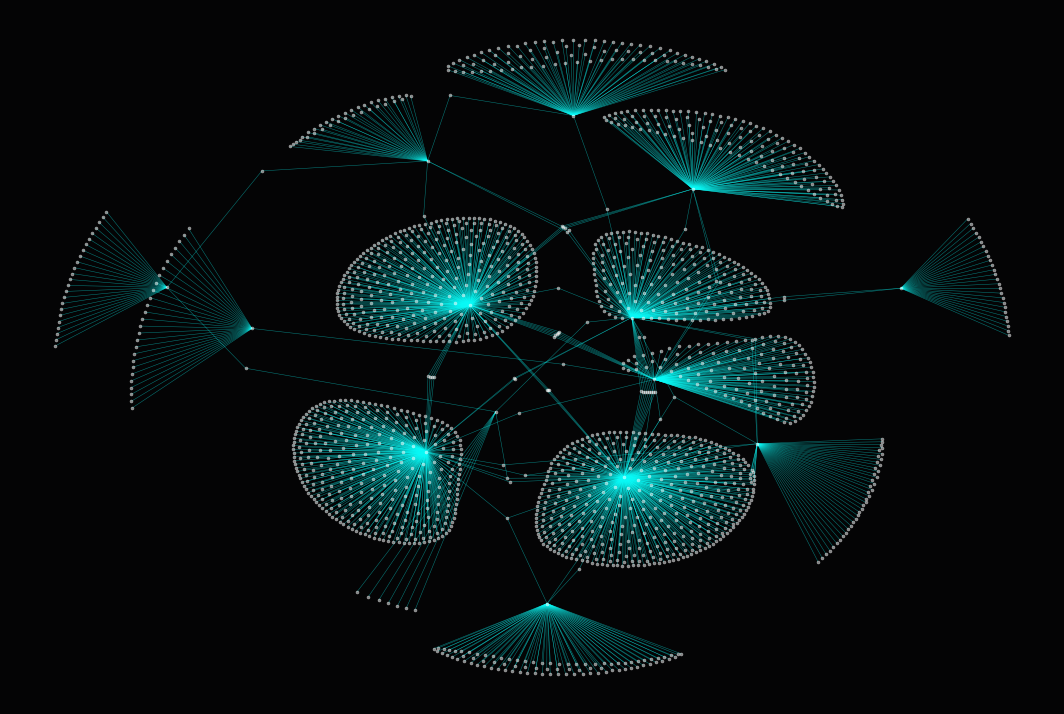

In [62]:
pd.set_option('precision',8)
G = nx.from_pandas_edgelist(df1, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,10), dpi=70)

nx.draw(G,pos,alpha = 0.5, nodelist = nodes, node_color = 'w', node_size = 10, with_labels= False,font_size = 2,
        width = 0.5, cmap = cmap, edge_color ='#0BFCF9')
fig.set_facecolor('#040405')

plt.show()


In [63]:
df2 = full_df[2000 : 5000]

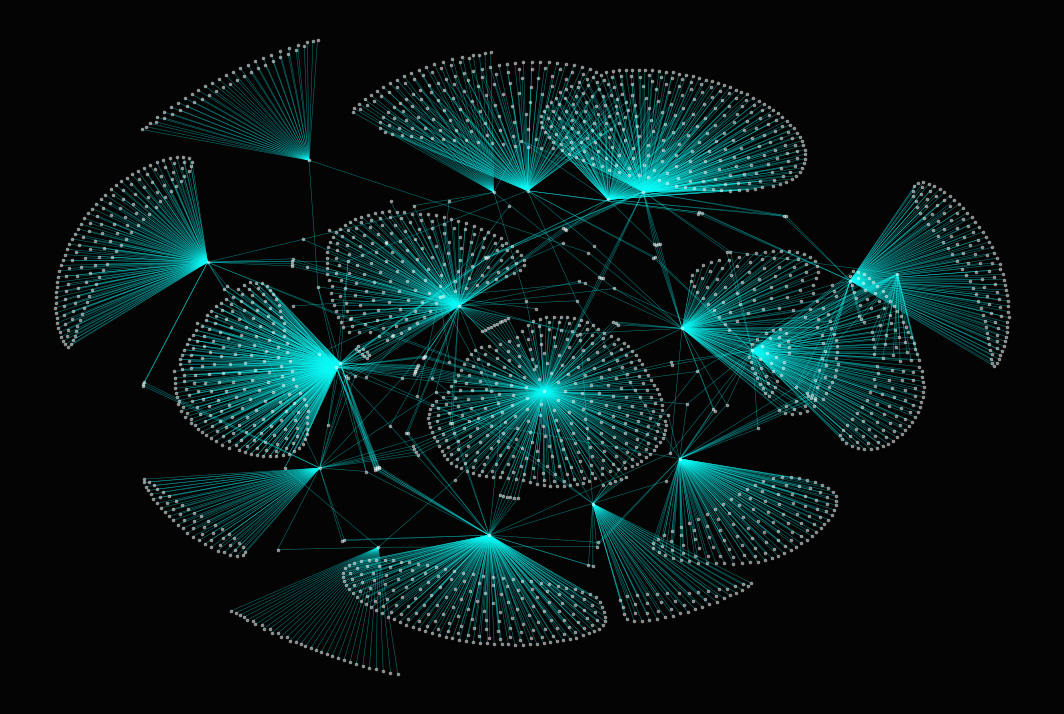

In [64]:
pd.set_option('precision',8)
G = nx.from_pandas_edgelist(df2, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,10), dpi=70)

nx.draw(G,pos,alpha = 0.5, nodelist = nodes, node_color = 'w', node_size = 10, with_labels= False,font_size = 2,
        width = 0.5, cmap = cmap, edge_color ='#0BFCF9')
fig.set_facecolor('#040405')

plt.show()


In [65]:
df3= full_df[10000:11111]

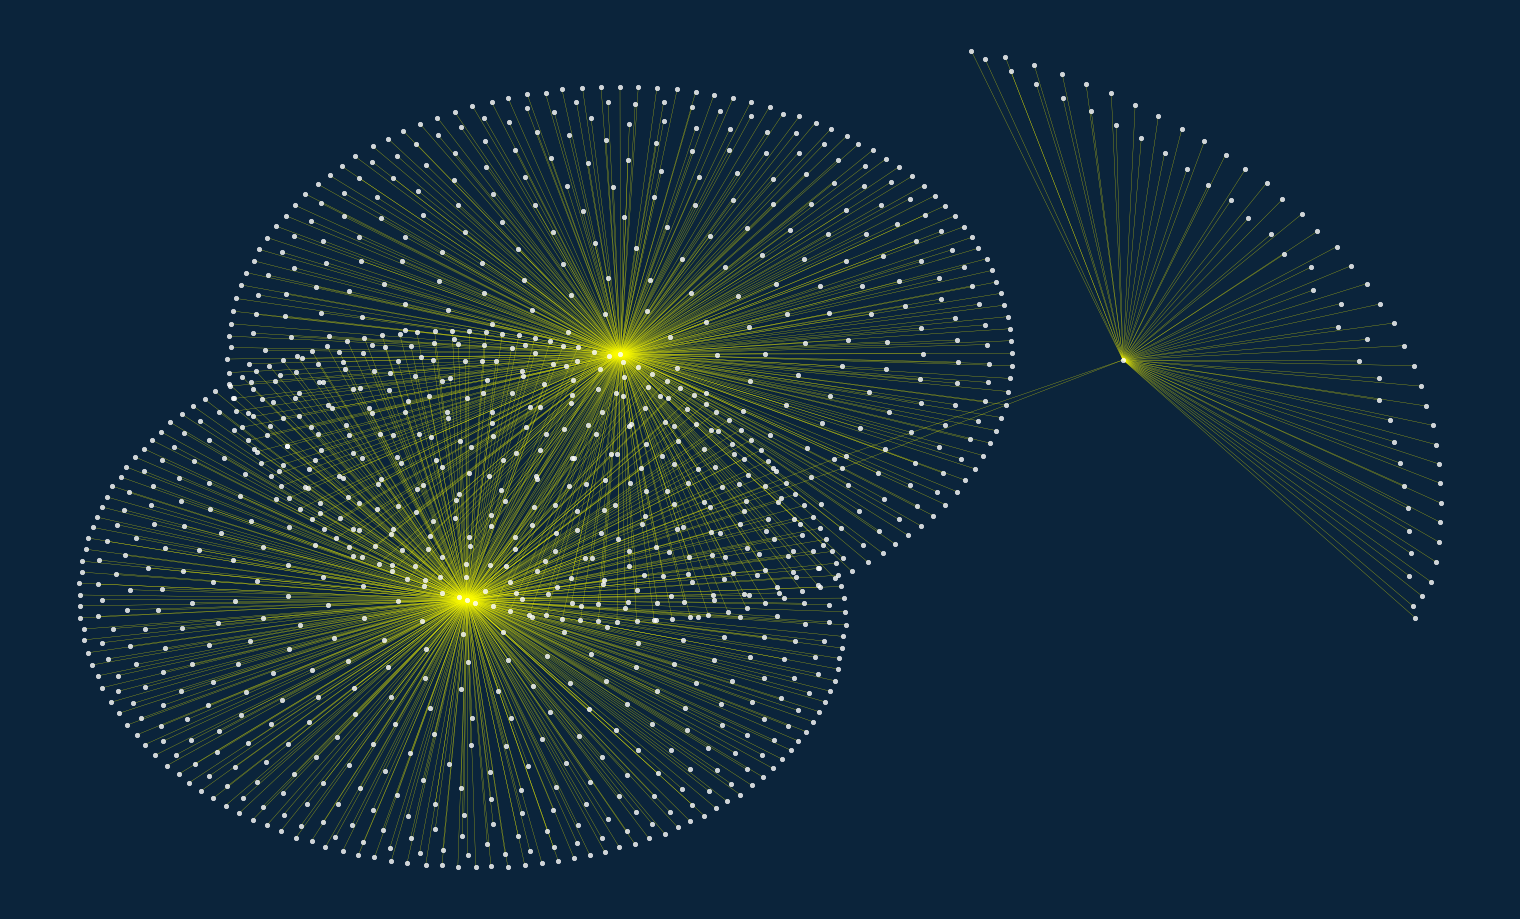

In [66]:
pd.set_option('precision',10)
G = nx.from_pandas_edgelist(df3, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 10, with_labels= False,font_size = 6,
        width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.show()

# Network Analysis

## Graph theory and network analysis

#### To assign roles and make categories between individuals we will calculate mathematical indicators from the theory of complex graphs:

### Who are the people who most influence the network?
#### The centrality of proximity: 
    This indicator makes it possible to detect the individuals who have a significant power on the transfer of information. Individuals with a large centralized proximity have the ability to contact a very large number of individuals easily
    
### Who are the people who influence the transfer of information?
#### The betweeness centrality:
    This indicator can detect individuals who influence the transfer of information. If these individuals do not exist in the network, then the information can not flow on both sides of the network.
    
### Which are the best performers in information transfer?
#### The eigenvector centrality: 
    The individuals having a high spectral centralized are the individuals who have the most relation in the network, they are central and have influence in a general way on the network.

In [37]:
# Calculation of the different coefficients of centrality and storage in a dataframe of independent nodes
# We will create an output dataframe with the nodes and their attributes to store the results of the analysis

In [53]:
# Degree of each node
for i in sorted(G.nodes()):
    G.node[i]['Degree'] = G.degree(i)

In [54]:
#extraction of network nodes in a dataframe
nodes_data = pd.DataFrame([i[1] for i in G.nodes(data=True)], index=[i[0] for i in G.nodes(data=True)])
nodes_data = nodes_data.sort_index(by='Degree',ascending= False)
nodes_data.index.names=['ID']
nodes_data.reset_index(level=0, inplace=True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
nodes_data.head()

,ID,Degree
0,205193250,441
1,234684445,359
2,226754592,344
3,217350178,213
4,182648870,146


In [56]:
# Betweenness centrality 
bet_cen = nx.betweenness_centrality(G)
df_bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
df_bet_cen.columns = ['betweenness_centrality']
df_bet_cen.index.names = ['ID']
df_bet_cen.reset_index(level=0, inplace=True)
analyse= pd.merge(nodes_data,df_bet_cen, on = ['ID'])


In [57]:
# Clustering coefficient 
clust_coefficients = nx.clustering(G)
df_clust = pd.DataFrame.from_dict(clust_coefficients, orient='index')
df_clust.columns = ['clust_coefficient']
df_clust.index.names = ['ID']
df_clust.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clust, on = ['ID'])


In [58]:
# Closeness centrality 
clo_cen = nx.closeness_centrality(G)
df_clo = pd.DataFrame.from_dict(clo_cen, orient='index')
df_clo.columns = ['closeness_centrality']
df_clo.index.names = ['ID']
df_clo.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clo, on = ['ID'])


In [59]:
# Eigenvector centrality
#eig_cen = nx.eigenvector_centrality(G)
#eig_cen = nx.katz_centrality(G)
eig_cen = nx.eigenvector_centrality_numpy(G)
df_eig = pd.DataFrame.from_dict(eig_cen, orient='index')
df_eig.columns = ['eigenvector_centrality']
df_eig.index.names = ['ID']
df_eig.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_eig, on = ['ID'])


In [60]:
analyse.head(30)

,ID,Degree,betweenness_centrality,clust_coefficient,closeness_centrality,eigenvector_centrality
0,205193250,441,0.42707087,0,0.34644828,0.70501995
1,234684445,359,0.36770482,0,0.34074593,0.02768353
2,226754592,344,0.32391670,0,0.33488212,0.03101135
3,217350178,213,0.32373358,0,0.34278668,0.02840777
4,182648870,146,0.18385695,0,0.32245236,0.00555199
5,216072216,137,0.13093106,0,0.24932735,0.00040189
6,73498632,88,0.08559934,0,0.24723669,0.00607868
7,183566364,88,0.08665928,0,0.21405786,0.00008085
8,182943766,52,0.04145926,0,0.25374886,0.01845677
9,13631520,40,0.05679052,0,0.23114384,0.00021043
